### Домашнее задание к занятию "Алгоритмы классификации: линейные методы, логистическая регрессия и SVM"

#### Условие:  
    Задача состоит в модификации кода градиентного спуска для задачи регрессии (ноутбук лекции - Gradient_descent.ipynb). Необходимо, чтобы ваш градиентный спуск мог решать задачи классификации, а именно линейной классификации и логистической регрессии.
 
Решение задачи можно найти в этой статье - https://dyakonov.org/2018/03/12/логистическая-функция-ошибки/.  
Там указан необходимый лосс и градиент"  
Также о логистической регрессии можно узнать по ссылке [Пережевывая логистическую регрессию](https://habr.com/ru/post/485872/)

In [169]:
import numpy as np
import random
from sklearn.datasets.samples_generator import make_regression 
import pylab
from scipy import stats

In [170]:
# генерируем случайные данные
x, y = make_regression(n_samples=100, n_features=1, n_informative=1, 
                        random_state=0, noise=35)

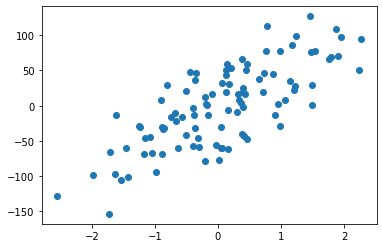

In [171]:
# посмотрим что получилось

pylab.plot(x, y, 'o')
pylab.show()

In [172]:
# размер данных

m, n = np.shape(x)
m, n

(100, 1)

In [173]:
# преобразуем x к следующему виду
x = np.c_[ np.ones(m), x]
x[:5]

array([[ 1.        , -0.35955316],
       [ 1.        ,  0.97663904],
       [ 1.        ,  0.40234164],
       [ 1.        , -0.81314628],
       [ 1.        , -0.88778575]])

In [174]:
# y лист значений
y[:5]

array([-31.74599395, -28.79914206,  -2.18450294,  28.96679712,
       -30.8791169 ])

### Сначала вручную

In [175]:
# шаг алгоритма
alpha = 0.01

In [176]:
def gradient_descent_2(alpha, x, y, numIterations):
    """
    Функция реализует алгоритм градиентного спуска. На каждом шаге выводится значение функции потерь
    """
    
    m = x.shape[0] # 100
    theta = np.ones(2) # [ 1.  1.] ВЕСА МОДЕЛИ!!!
    x_transpose = x.transpose() # транспонированная матрица x
    
    for iter in range( 0, numIterations ):
        hypothesis = np.dot(x, theta) # матричное произведение
        
        loss = hypothesis - y
        J = np.sum(loss ** 2) / (2 * m)  # функция потерь
        
#         print( "iter %s | J: %.3f" % (iter, J) )
        
        gradient = np.dot(x_transpose, loss) / m         
        theta = theta - alpha * gradient  # update
    
    return theta

GRADIENT = (X_T * веса) / количество_данных

1 2 3 4
1 2 3 4
1 2 3 4
1 2 3 4
1 2 3 4
1 2 3 4

1 1 1 1 1 1 1 1 1 1 1 1    0.4
2 2 2 2 2 2 2 2 2 2 2 2    0.334
3 3 3 3 3 3 3 3 3 3 3 3    0.34
4 4 4 4 4 4 4 4 4 4 4 4    0.23


In [177]:
%%time
theta = gradient_descent_2(alpha, x, y, 1000)

Wall time: 19.9 ms


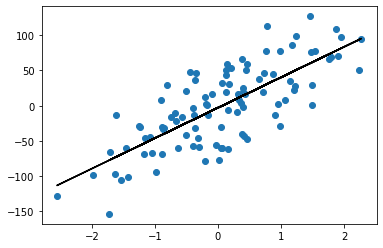

In [178]:
# построим полученную линию из theta
for i in range(x.shape[1]):
    y_predict = theta[0] + theta[1]*x 
    
# рисуем результат
pylab.plot(x[:,1],y,'o')
pylab.plot(x,y_predict,'k-')
pylab.show()

---

### Используем готовые методы

In [179]:
from sklearn import linear_model

In [180]:
model = linear_model.SGDRegressor( alpha = 0.01, max_iter = 1000 )

In [181]:
x, y = make_regression(n_samples=100, n_features=1, n_informative=1, 
                        random_state=0, noise=35)

In [182]:
%%time 

model.fit( x, y )

Wall time: 974 µs


SGDRegressor(alpha=0.01, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.01, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty='l2', power_t=0.25, random_state=None,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [183]:
model.intercept_, model.coef_

(array([-2.79850041]), array([42.70711634]))

In [184]:
y_predict_sgd = model.predict( x )

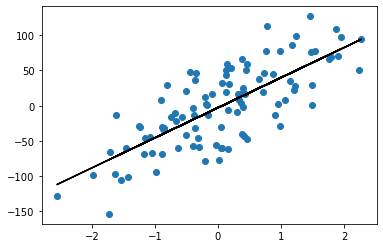

In [185]:
pylab.plot(x, y, 'o')
pylab.plot(x, y_predict_sgd, 'k-')
pylab.show()

---

## Градиентный спуск логистической регрессии

При вычислении функции логистического отклика понадобится вычисления экспоненты:

Вот увидел ссылочка https://www.machinelearningmastery.ru/generate-test-datasets-python-scikit-learn/
и еще https://progi.pro/chto-oznachayut-parametri-n_features-i-center-v-make_blobs-v-scikit-528841

### Приведём для ознакомления несколько примеров работы make_blobs

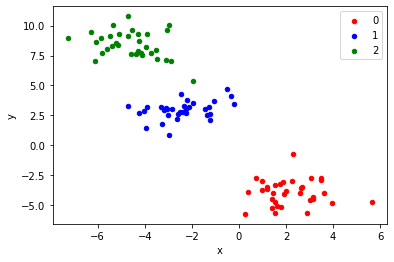

In [33]:
from sklearn.datasets.samples_generator import make_blobs
from matplotlib import pyplot
from pandas import DataFrame
# generate 2d classification dataset
X, y = make_blobs(n_samples=100, centers = 3, n_features=2)
# scatter plot, dots colored by class value
df = DataFrame(dict(x=X[:,0], y=X[:,1], label=y))
colors = {0:'red', 1:'blue', 2:'green'}
fig, ax = pyplot.subplots()
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
pyplot.show()

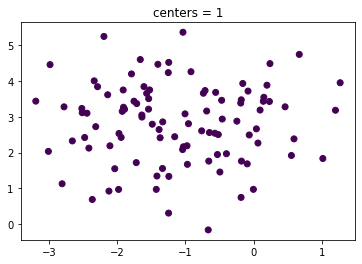

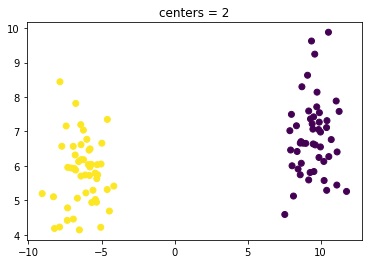

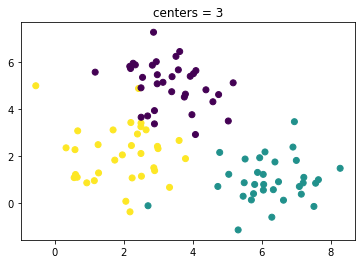

In [34]:
from sklearn.datasets.samples_generator import make_blobs
from matplotlib import pyplot as plt

# plot 1
X, y = make_blobs(n_features=2, centers=1)
plt.figure()
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.savefig('centers_1.png')
plt.title('centers = 1')



# plot 2    
X, y = make_blobs(n_features=2, centers=2)
plt.figure()
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.title('centers = 2')



# plot 3
X, y = make_blobs(n_features=2, centers=3)
plt.figure()
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.title('centers = 3')



plt.show()

## Выберем и создадим датасет для классификации логистической регрессией!

Text(0.5, 1.0, 'centers = 2')

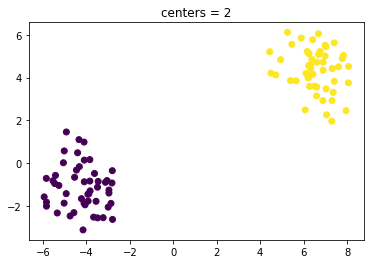

In [253]:
X, y = make_blobs(n_features=2, centers=2)
plt.figure()
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.title('centers = 2')

Абсцисса:

In [254]:
X[:, 0]

array([-4.45313978, -5.45513358, -5.93885383, -2.95824814, -3.82630091,
        5.45687438,  4.7134083 , -4.9181713 ,  8.05644267,  6.31981327,
        6.41194329,  7.4071014 ,  6.43092862, -3.12064586,  7.03156419,
       -3.22470527, -5.83971115, -5.83464397, -4.2240971 ,  6.98634528,
       -3.66452308,  7.4091594 ,  7.60300545,  4.49627985, -5.02138745,
       -5.05430911, -4.53903522, -4.1502405 , -4.39994305, -3.04725913,
       -3.91734903,  4.43858977, -2.86422725,  6.24848293,  4.93855348,
        8.0640738 , -2.81954761,  6.68484423, -3.55181252, -4.33722658,
       -4.57046469, -2.80469486, -5.5347732 ,  7.82997406,  6.22723425,
        7.30381379,  6.06904872,  6.9911245 ,  7.0538741 , -3.92713951,
        7.03241021, -3.83705029, -4.32066514,  6.75484074,  6.19579891,
        6.16346523, -3.62353383, -4.0561429 ,  7.95019777,  6.60602125,
       -4.09347887, -2.99521943,  6.8887649 , -4.10373619,  6.24302631,
        6.10573579,  6.37608867, -4.74535121,  6.68179742,  7.31

Ордината:

In [255]:
X[:, 1]

array([-0.32292332, -0.95144389, -1.57790037, -1.25529669, -1.29629481,
        5.56146621,  4.12621964,  1.45932086,  3.75712829,  4.42436983,
        5.77548314,  5.62797773,  4.16325707, -0.89359014,  5.44836567,
       -2.54920682, -0.71064056, -1.821346  , -1.66037948,  5.01371126,
       -2.52388714,  3.83210159,  4.50449827,  4.21015273, -1.87021271,
        0.01868872, -0.65889332, -3.12246182,  0.48586381, -0.81369523,
       -1.77172299,  5.21082098, -1.88111861,  4.10907929,  4.84095208,
        4.52480188, -0.9263006 ,  5.07340873, -1.78397203,  1.10097628,
       -2.3138072 , -0.35228256, -0.82247755,  5.03978349,  4.56415381,
        2.92648869,  2.4901092 ,  5.51575414,  2.26204195, -1.45481205,
        3.47471155,  0.16618688, -0.16399798,  5.22901538,  4.00382017,
        5.22372157, -0.4813026 , -1.94904417,  2.45238826,  4.72418202,
       -0.87123752, -2.05646882,  2.92726536,  0.98661948,  5.12669322,
        4.19756582,  4.86263158, -2.47029173,  6.05277962,  4.42

Класс (цвет):

In [256]:
y

array([0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1])

In [257]:
from math import exp

In [258]:
def gradient_descent_lr(alpha, x, y, numIterations):
    
    m =x.shape[0] # 100
    theta = np.ones(2) # [ 1. 1.]
    x_transpose = x.transpose()
    for iter in range(0, numIterations):
        hypothesis_0 = np.dot(x, theta)
        loss = 0
        for val in hypothesis_0:
            hypothesis = 1.0/(1.0 + exp((-1)*float(val)))
            loss += ((float(hypothesis) - y))
        J = np.sum(loss ** 2)
        gradient = (1.0 / m) * np.dot(x_transpose, loss)
        theta = theta - alpha * gradient
        
    return theta

In [259]:
%%time
alpha = 0.0001
theta = gradient_descent_lr(alpha, X, y, 1000)

Wall time: 366 ms


In [260]:
theta

array([27.85279857, 14.68022061])

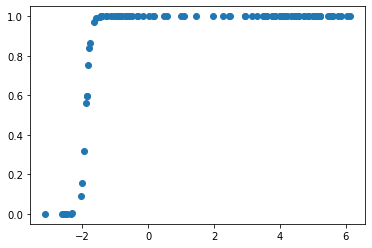

In [261]:
y_predict = []
for i in X: 
    y_predict.append(1/(1+exp(-1*(theta[0] + theta[1]*i[1]))))
pylab.plot(X[:,1],y_predict,'o')
#pylab.plot(x,y_predict,'k-')

pylab.show()

In [262]:
y_predict

[0.9999999999082738,
 0.9999990674968156,
 0.9908867704073504,
 0.9999193060524589,
 0.9998527019051507,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.999999601157265,
 1.0,
 6.977814792793338e-05,
 0.9999999728105916,
 0.7530670519528263,
 0.9700570669352013,
 1.0,
 0.00010118877827397121,
 1.0,
 1.0,
 1.0,
 0.5981261545652486,
 0.9999999999993912,
 0.9999999872801147,
 1.545041728290447e-08,
 0.9999999999999993,
 0.9999998765677195,
 0.8633638052648508,
 1.0,
 0.5591128477930458,
 1.0,
 1.0,
 1.0,
 0.9999993553137863,
 1.0,
 0.8407334684205595,
 1.0,
 0.0022059216765509078,
 0.999999999858852,
 0.9999998595826596,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.9984925643980117,
 1.0,
 0.9999999999999301,
 0.9999999999911027,
 1.0,
 1.0,
 1.0,
 0.9999999990619053,
 0.3187331469066673,
 1.0,
 1.0,
 0.999999712729026,
 0.08813538451721781,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.00022221808987732332,
 1.0,
 1.0,
 0.9999964642886527,
 0.9999997743596668,
 1.0,
 1.0,
 0.0017025866247357792,
 1.0,
 

In [263]:
y_predict[0], y[0], theta, X[0]

(0.9999999999082738,
 0,
 array([27.85279857, 14.68022061]),
 array([-4.45313978, -0.32292332]))

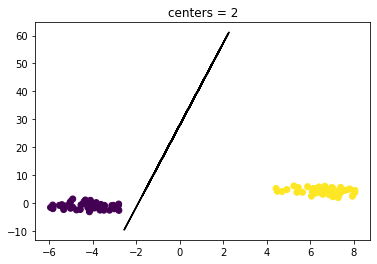

In [264]:
# построим полученную линию из theta
for i in range(x.shape[1]):
    y_predict =  theta[0] + theta[1]*x 
    
# рисуем результат
plt.figure()
plt.scatter(X[:, 0], X[:, 1], c=y)
#pylab.plot(x,y_predict,'k-')
plt.title('centers = 2')
pylab.plot(x,y_predict,'k-')
pylab.show()

### Используем готовые методы

In [266]:
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing

In [267]:
model = LogisticRegression()

In [268]:
le = preprocessing.LabelEncoder()
y_R = le.fit_transform(y)

In [269]:
y_R

array([0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1], dtype=int64)

In [270]:
model.fit(X, y_R)
predictions = model.predict_proba(X)

In [271]:
model.score(X, y_R)

1.0

In [272]:
model_R = linear_model.SGDRegressor(alpha = 0.000001, max_iter = 1000)

In [273]:
model_R.fit(X, y_R)

SGDRegressor(alpha=1e-06, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.01, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty='l2', power_t=0.25, random_state=None,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [274]:
model_R.intercept_, model_R.coef_

(array([0.26810606]), array([0.04975156, 0.08091005]))

In [275]:
y_predict_sgd = model_R.predict(X)

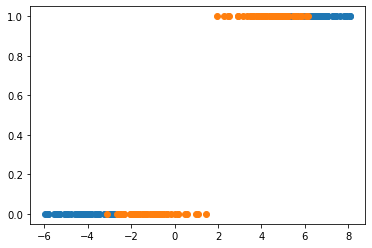

In [276]:
pylab.plot(X, y_R, 'o')
#pylab.plot(X, y_predict_sgd, 'k-')
pylab.show()

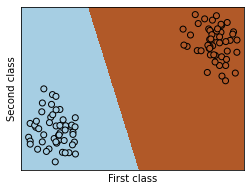

In [277]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn import datasets


logreg = LogisticRegression(C=1e5)

# Create an instance of Logistic Regression Classifier and fit the data.
logreg.fit(X, y)

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
h = .02  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(4, 3))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('First class')
plt.ylabel('Second class')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

plt.show()


In [278]:
y

array([0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1])

In [279]:
y_predict

array([[42.53301919, 22.57447884],
       [42.53301919, 42.19007509],
       [42.53301919, 33.75926263],
       [42.53301919, 15.91563177],
       [42.53301919, 14.81990794],
       [42.53301919, 34.36880875],
       [42.53301919, 13.5061437 ],
       [42.53301919, 34.14080493],
       [42.53301919, 30.9103212 ],
       [42.53301919, 23.27913867],
       [42.53301919, 20.35406647],
       [42.53301919, 29.71589609],
       [42.53301919,  5.30040235],
       [42.53301919, 21.95456579],
       [42.53301919, 37.44806375],
       [42.53301919, 45.15754273],
       [42.53301919, 25.21146229],
       [42.53301919, 54.06977141],
       [42.53301919, 49.20185449],
       [42.53301919, 17.79963536],
       [42.53301919, 42.2208881 ],
       [42.53301919, 55.68486993],
       [42.53301919, 21.42177118],
       [42.53301919, 32.4487015 ],
       [42.53301919, 39.02500027],
       [42.53301919, 39.26652852],
       [42.53301919, 56.49061174],
       [42.53301919, 32.75121131],
       [42.53301919,